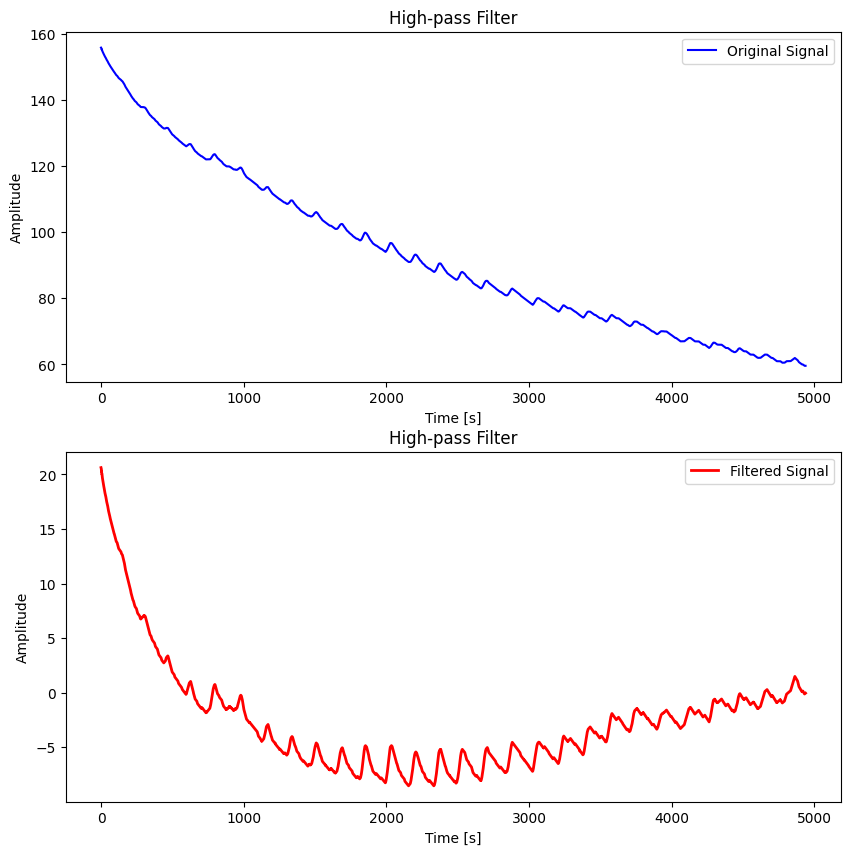

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import butter, filtfilt, hilbert
from scipy.optimize import curve_fit
from scipy import signal

deflation_values = [156,156,161,154,162,154,156,159,156,157,156,157,156,156,156,156,156,155,155,155,155,155,155,155,155,155,154,154,154,154,154,154,154,154,154,154,154,154,153,153,153,153,153,153,153,153,153,153,153,153,153,152,152,152,152,152,152,152,152,152,152,152,152,151,151,151,151,151,151,151,151,151,151,151,151,150,151,150,150,150,150,150,150,150,150,150,150,150,150,150,150,149,149,149,149,149,149,149,149,149,149,149,149,149,149,148,149,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,145,145,145,145,145,145,145,145,145,145,144,144,144,144,144,144,144,144,144,144,144,144,144,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,142,142,142,142,142,142,142,142,142,142,142,142,142,141,141,141,141,141,141,141,141,141,141,141,141,141,140,140,141,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,138,139,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,137,138,137,137,137,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,137,137,137,137,137,137,137,137,137,137,137,137,136,137,136,136,136,136,136,136,136,136,136,136,136,136,136,135,135,136,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,131,131,131,131,131,131,131,131,131,131,131,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,126,127,127,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,126,126,126,126,126,126,126,126,126,126,126,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,124,125,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,122,122,122,122,123,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,123,123,123,123,123,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,123,123,123,123,123,123,123,123,123,123,123,123,123,123,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,121,122,122,122,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,120,120,120,121,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,119,120,120,119,120,120,120,120,120,120,120,120,119,120,120,120,120,120,120,120,120,120,120,119,120,120,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,118,118,118,119,118,119,119,119,119,119,119,119,119,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,119,119,119,119,119,119,119,119,119,118,118,118,118,118,118,118,118,118,118,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,116,117,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,112,113,113,113,113,113,112,113,113,112,113,112,112,113,113,113,113,113,113,113,113,113,113,113,113,113,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,113,113,113,113,113,113,113,113,113,113,113,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,111,111,111,112,112,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,109,110,109,110,110,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,108,108,108,108,108,108,108,108,108,108,108,108,108,109,109,109,109,109,109,109,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,107,108,107,108,107,107,108,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,104,105,104,104,104,104,105,105,104,104,105,105,105,105,105,105,105,106,106,106,106,106,106,106,106,106,106,107,107,107,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,105,105,105,105,105,105,105,105,105,105,105,105,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,102,103,103,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,101,102,102,102,102,102,101,102,102,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,102,102,102,102,102,102,102,103,103,103,103,103,103,103,103,103,103,103,103,103,103,102,103,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,98,98,99,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,97,97,97,97,97,97,97,97,97,97,97,97,97,97,98,98,98,98,98,98,99,99,99,99,99,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,99,99,99,99,99,99,99,99,99,99,99,99,98,98,98,98,98,98,98,98,98,98,98,98,98,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,95,95,95,95,95,96,96,96,96,96,96,96,96,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,96,96,96,96,96,96,96,96,96,96,96,96,96,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,92,92,92,92,93,93,93,93,93,93,93,93,93,93,93,94,93,94,94,94,94,94,93,94,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,89,89,89,89,89,90,90,90,90,90,90,90,91,90,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,89,89,89,89,89,89,89,89,89,89,89,89,89,88,89,89,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,87,88,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,85,85,85,85,85,85,85,85,85,85,85,86,86,86,86,86,87,87,87,87,87,87,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,85,86,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,83,83,84,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,84,84,84,84,85,85,85,85,85,85,85,85,85,86,86,85,86,86,86,85,86,86,86,86,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,84,85,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,83,84,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,80,80,80,81,81,81,81,81,81,81,82,82,82,82,82,82,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,79,79,79,79,79,80,80,80,80,80,80,80,80,81,80,81,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,79,80,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,78,79,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,77,77,77,77,77,77,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,77,77,78,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,74,74,74,75,75,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,75,75,75,75,75,75,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,74,75,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,73,74,74,74,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,74,74,74,74,74,74,74,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,72,73,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,71,71,71,71,71,71,71,71,71,71,71,71,72,72,72,72,72,72,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,72,72,72,73,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,71,72,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,69,70,69,70,70,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,70,70,70,70,70,70,70,70,70,70,71,70,70,70,70,70,70,70,70,70,71,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,68,68,69,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,68,68,68,68,68,68,68,68,68,69,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,66,66,66,66,66,66,66,66,67,66,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,66,66,66,67,67,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,64,65,65,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,63,63,63,63,63,63,63,63,64,64,64,64,64,64,64,64,64,65,64,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,64,65,65,65,65,64,65,64,65,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,62,63,62,62,63,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,61,62,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,60,61,60,60,60,60,60,60,60,60,60,60,60,60,60,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,60,60,61,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,59,59,59,59,59,59,59,59,59,59,59,59,60,60,60,60,60,60,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
]

arr_trimmed = np.trim_zeros(deflation_values, 'b')

# Moving Average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Set the window size for the moving average
window_size = 30  # Adjust based on the desired smoothing level

# Apply moving average
smoothed_deflation_signal = moving_average(arr_trimmed, window_size)

# Design a high-pass filter
order = 2
cutoff_frequency = 0.1  # Adjust this cutoff frequency as per your requirements
b, a = signal.butter(order, cutoff_frequency, 'high', fs=1000)

# Apply the filter to the signal
filtered_signal = signal.filtfilt(b, a, smoothed_deflation_signal)

# Plot the original and filtered signals
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(smoothed_deflation_signal, 'b-', label='Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('High-pass Filter')
plt.legend()

plt.subplot(2,1,2)
plt.plot(filtered_signal, 'r-', linewidth=2, label='Filtered Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('High-pass Filter')
plt.legend()
plt.show()
